# Dataset no drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importando as Bibliotecas

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
import keras
import tensorflow.keras.utils as utils
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# caminho da pasta do dataset
diretorio = '/content/drive/MyDrive/dataset/soja'

In [ ]:
#parametros para o carregador lotes(batch_size), altura(img_height) e largura(img_width)
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#utilizando 80% pra treino (train_ds) e 20% testes (val_ds)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  diretorio,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15336 files belonging to 4 classes.
Using 12269 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  diretorio,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15336 files belonging to 4 classes.
Using 3067 files for validation.


In [ ]:
# nomes das classes
class_names = train_ds.class_names

print(class_names)

['broadleaf', 'grass', 'soil', 'soybean']


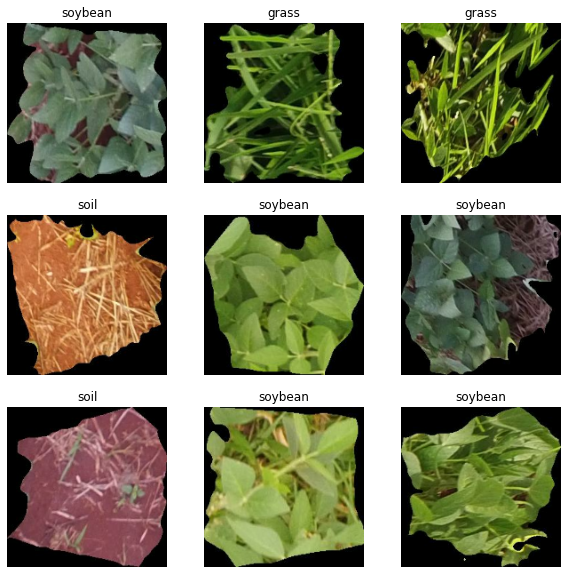

In [ ]:
#visulaizando as 9 primeiras imagens do diretório de treino 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# definindo conjunto de dados para utilizar no treinamento do modelo
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# por padrão os valores do canal RGB estão entre [0, 255]
# diminuindo os valores de entrada para [0,1], utilizando uma camada de reescalonamento.
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# valores dos pixels está entre `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.81745267


In [ ]:
#criando o modelo, conectado com 128 camada atraves da função relu
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
#compilando o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#treinando o modelo
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=10 )

Epoch 1/10
384/384 [==============================] - 26s 62ms/step - loss: 0.5246 - accuracy: 0.7947 - val_loss: 0.3165 - val_accuracy: 0.8774
Epoch 2/10
384/384 [==============================] - 20s 53ms/step - loss: 0.2931 - accuracy: 0.8922 - val_loss: 0.2623 - val_accuracy: 0.9032
Epoch 3/10
384/384 [==============================] - 16s 43ms/step - loss: 0.2059 - accuracy: 0.9243 - val_loss: 0.1775 - val_accuracy: 0.9410
Epoch 4/10
384/384 [==============================] - 17s 43ms/step - loss: 0.1355 - accuracy: 0.9490 - val_loss: 0.1516 - val_accuracy: 0.9459
Epoch 5/10
384/384 [==============================] - 17s 43ms/step - loss: 0.0737 - accuracy: 0.9760 - val_loss: 0.1522 - val_accuracy: 0.9482
Epoch 6/10
384/384 [==============================] - 16s 43ms/step - loss: 0.0492 - accuracy: 0.9834 - val_loss: 0.1927 - val_accuracy: 0.9413
Epoch 7/10
384/384 [==============================] - 17s 43ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.2900 - val_accuracy:

In [ ]:
#validando o modelo
validacao = model.evaluate(val_ds)

96/96 [==============================] - 2s 17ms/step - loss: 0.0771 - accuracy: 0.9749


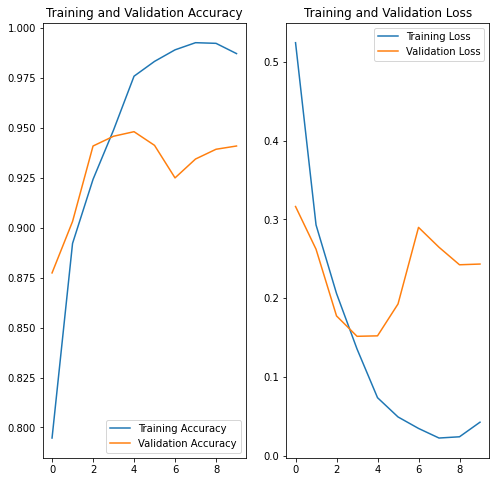

In [ ]:
epochs = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#aumentando os dados aparti dos dados existente, para obter uma melhor performace
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
384/384 [==============================] - 22s 52ms/step - loss: 0.5014 - accuracy: 0.8076 - val_loss: 0.4130 - val_accuracy: 0.8285
Epoch 2/15
384/384 [==============================] - 19s 50ms/step - loss: 0.2844 - accuracy: 0.8933 - val_loss: 0.2519 - val_accuracy: 0.9051
Epoch 3/15
384/384 [==============================] - 19s 49ms/step - loss: 0.2556 - accuracy: 0.9025 - val_loss: 0.2045 - val_accuracy: 0.9247
Epoch 4/15
384/384 [==============================] - 19s 49ms/step - loss: 0.2107 - accuracy: 0.9210 - val_loss: 0.2048 - val_accuracy: 0.9204
Epoch 5/15
384/384 [==============================] - 19s 48ms/step - loss: 0.2113 - accuracy: 0.9180 - val_loss: 0.1952 - val_accuracy: 0.9279
Epoch 6/15
384/384 [==============================] - 19s 49ms/step - loss: 0.1825 - accuracy: 0.9313 - val_loss: 0.2480 - val_accuracy: 0.9169
Epoch 7/15
384/384 [==============================] - 19s 48ms/step - loss: 0.1582 - accuracy: 0.9401 - val_loss: 0.1256 - val_accuracy:

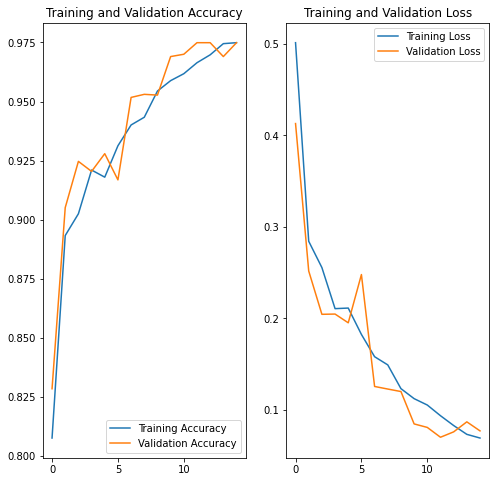

In [ ]:
# vizualizando a precisão do treinamento e a validação
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Esta imagem provavelmente é 'GRASS' com 99.25% de confiança.


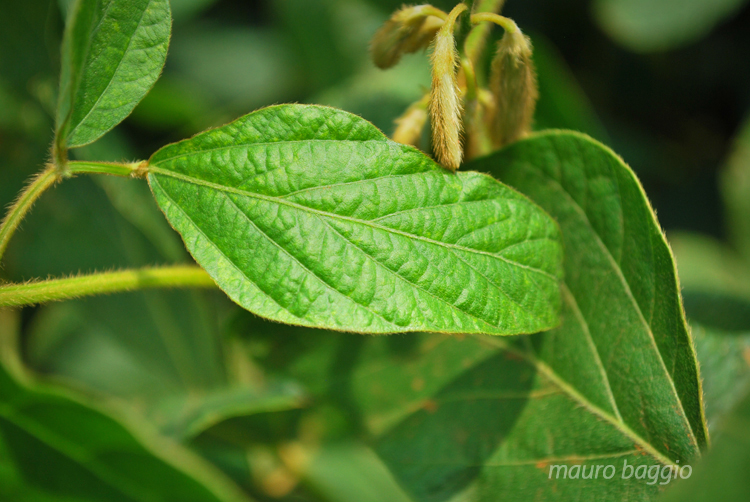

In [ ]:
import PIL
foto = '/content/foto-Mauro-Baggio.jpg'

img = keras.preprocessing.image.load_img(
    foto, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Esta imagem provavelmente é\033[1m '{}' \033[0mcom {:.2f}% de confiança.".format(class_names[np.argmax(score)].upper(), 100 * np.max(score)))
PIL.Image.open(str(foto))

# Conversor de imagem .tif para .jpeg, e salvando no drive

In [ ]:
import cv2, os

#diretorio
lista_arquivos = os.listdir( "/content/drive/MyDrive/dataset/soybeans/train/soybean/")

for arquivo in lista_arquivos:
  #abrir arquivo
  imagem = Image.open(f"/content/drive/MyDrive/dataset/soybeans/train/soybean/{arquivo}").convert("RGB")

  #salvar imagens
  imagem.save(f"/content/drive/MyDrive/dataset/soja/soybean/{arquivo.replace('tif','jpeg')}")
